### Name : Shivang Gupta
### Roll No : 3055
### Deep Learning Assignment No : 3
### Problem Statement :  Build the Image classification model by dividing the model in following Four stages :
#### a. Loading and preprocessing the image
#### b. Defining the model architecture
#### c. Training the model
#### d. Estimating the model’s performance.     

#### Importing Libraries

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten,Conv2D

Sequential is used to create a sequential model.
Dense is for creating fully connected (dense) layers in  neural network.
MaxPooling2D is used for max-pooling layers in a CNN, which reduces the spatial dimensions of the data.
Flatten is used to flatten the output from convolutional or pooling layers into a 1D vector.
Conv2D is used for 2D convolution layers, which are crucial in CNNs for feature extraction.

#### Loading the Dataset

In [2]:
x_train = np.loadtxt("Animal_Data/input.csv",delimiter=",")
y_train = np.loadtxt('Animal_Data/labels.csv', delimiter =',')

x_test = np.loadtxt('Animal_Data/input_test.csv', delimiter =',')
y_test = np.loadtxt('Animal_Data/labels_test.csv', delimiter =',')

In [3]:
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of x_test :  (400, 30000)
Shape of y_test :  (400,)


In [4]:
x_train = x_train.reshape(len(x_train),100,100,3)   # (number_of_samples, height, width, channels)
#It's reshaped to (100, 100, 3) where 100x100 is the image size, and 3 represents the number of color channels(RGB).
y_train = y_train.reshape(len(y_train),1)  # (number_of_samples, 1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)


Shape of x_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


#### Normalizing and Displaying 

In [5]:
x_train = x_train/255  # Normalizing the pixel value to [0,1]
x_test = x_test/255

x_train[1,:]   # indexing the second sample in  training data - 0-based indexing

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

#### Displaying random image from dataset 

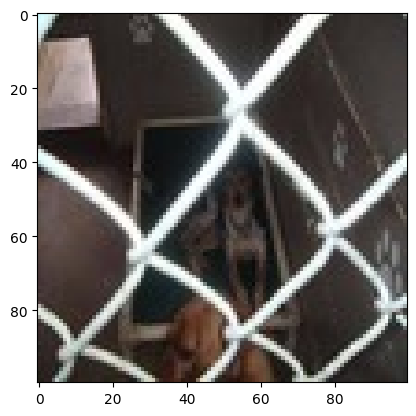

In [6]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0,len(x_train))

plt.imshow(x_train[idx,:])
plt.show()

#### Model Building

In [7]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(100,100,3)), 
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),  # 64 units or neurons
    Dense(1, activation = 'sigmoid') # 1 unit or neuron
])

1) First convolutional layer with 32 filters, a filter size of 3x3, ReLU activation and input_shape dimensions 
   of 100x100 pixels with 3 color channels (RGB).
2) First max-pooling layer with a pool size of 2x2. It reduces the spatial dimensions of the data 
   by taking the maximum value within each 2x2 region.
3) Flatten(): This layer is used to flatten the output from the previous layers into a 1D vector. 
   It prepares the data for the fully connected layers.

In [8]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])
# loss function = binary_crossentropy is used for binary classification
# adam optimizer is used for  adaptive learning rates and efficient convergence

In [9]:
H = model.fit(x_train, y_train, epochs = 10, batch_size = 64)
# The epochs parameter specifies the number of times the model will iterate over the entire training dataset.
# The batch_size parameter determines the number of samples that are processed together in each iteration.

Epoch 1/10
32/32 [==============================] - 23s 630ms/step - loss: 0.8226 - accuracy: 0.4970
Epoch 2/10
32/32 [==============================] - 16s 514ms/step - loss: 0.6878 - accuracy: 0.5650
Epoch 3/10
32/32 [==============================] - 16s 510ms/step - loss: 0.6484 - accuracy: 0.6405
Epoch 4/10
32/32 [==============================] - 17s 542ms/step - loss: 0.5689 - accuracy: 0.7050
Epoch 5/10
32/32 [==============================] - 17s 543ms/step - loss: 0.5271 - accuracy: 0.7540
Epoch 6/10
32/32 [==============================] - 17s 526ms/step - loss: 0.4883 - accuracy: 0.7685
Epoch 7/10
32/32 [==============================] - 18s 550ms/step - loss: 0.4293 - accuracy: 0.7945
Epoch 8/10
32/32 [==============================] - 18s 573ms/step - loss: 0.3805 - accuracy: 0.8295
Epoch 9/10
32/32 [==============================] - 17s 542ms/step - loss: 0.3419 - accuracy: 0.8415
Epoch 10/10
32/32 [==============================] - 17s 527ms/step - loss: 0.2799 - accura

#### Evaluation

In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

13/13 [==============================] - 1s 66ms/step - loss: 0.7793 - accuracy: 0.6650
Loss=0.779
Accuracy=0.665


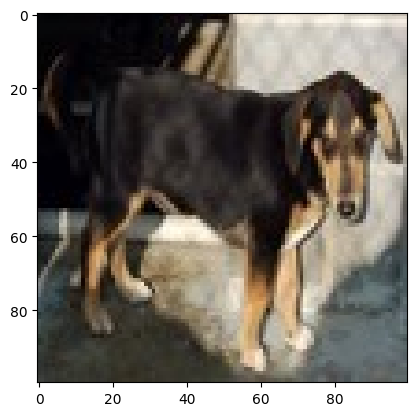

1/1 [==============================] - 0s 135ms/step
It is a dog


In [11]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))  #(1 sample of size 100x100 with 3 color channels)

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("It is a",pred)

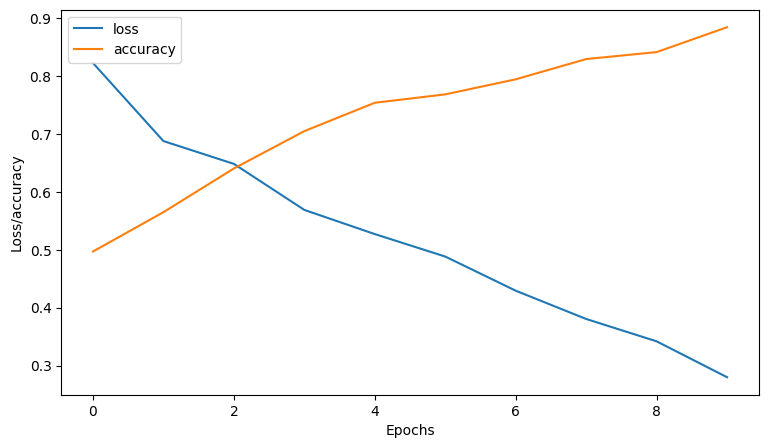

In [12]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.ylabel("Loss/accuracy")
plt.xlabel("Epochs")
plt.show()